In [222]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [223]:
#reading the data
wine = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/Summer 2023/AIDI 1009 Neural Networks/Assignment 1/data/winequality-red.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [224]:
#checking the shape of data
print(wine.shape)

(1599, 12)


* so we have 1599 rows and 12 columns in our dataset

In [225]:
#checking datatypes
print(wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [226]:
#getting a quick summary of distribuition of data
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [227]:
#checking the number of observations for different quality of wines
wine.value_counts("quality")

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

* Here we can see that we have 6 values that indicates the different quality of wines
* We can say that we have 6 classes of wine.


In [228]:
#checking for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* no missing value found for any column

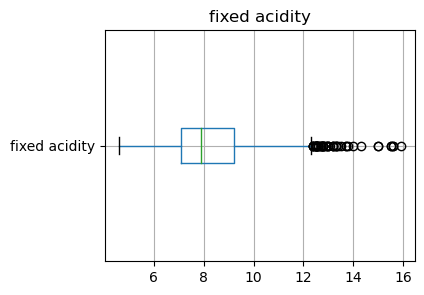

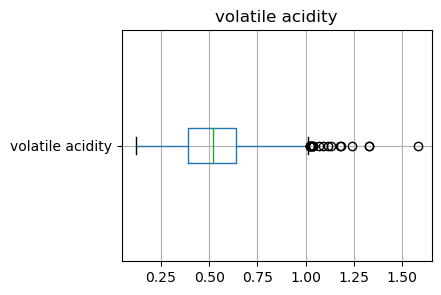

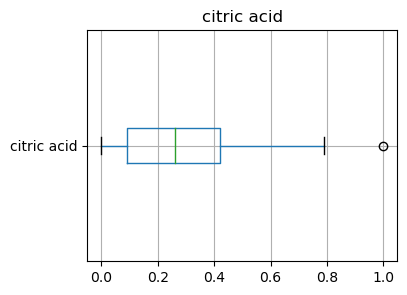

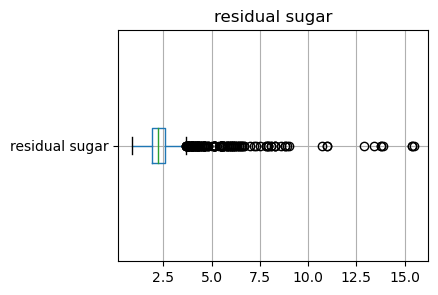

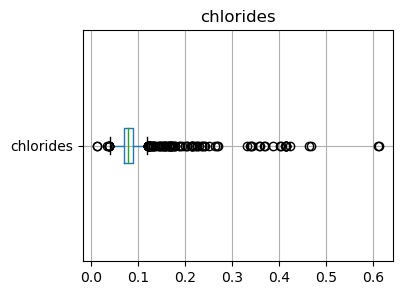

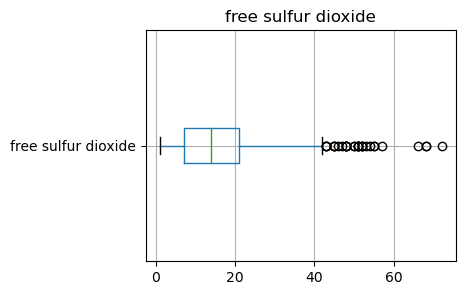

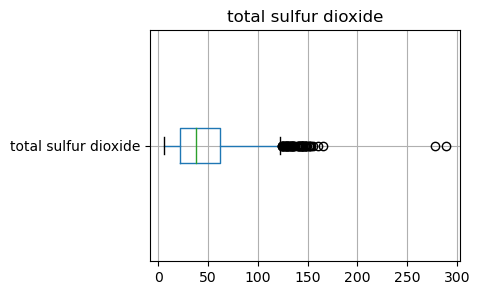

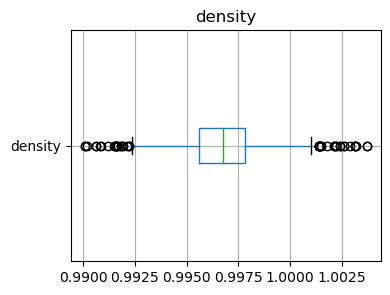

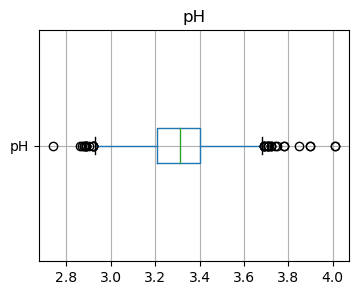

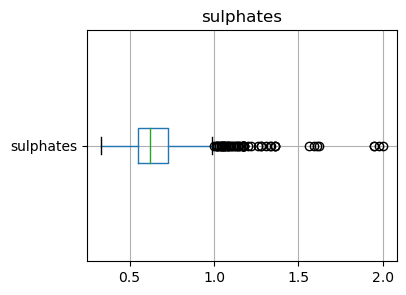

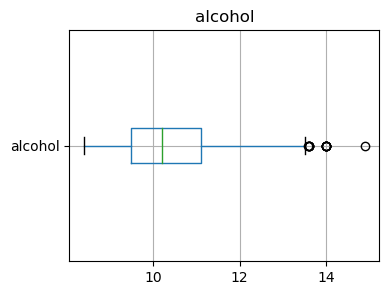

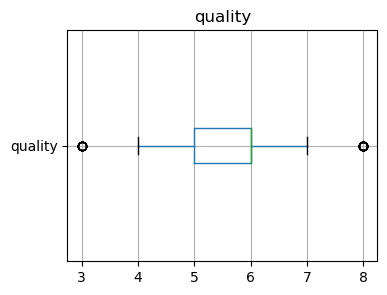

In [229]:
#checking for outliers using boxplot
for feature in wine.columns:
    plt.figure(figsize=(4,3))
    wine.boxplot([feature], vert = False)
    plt.title(feature)
    plt.show()

### Observation from boxplots
* we can observe there are some outliers for each columns we will try to handle them with z - score method

In [230]:
# z-score method to remove outliers
from scipy import stats
z = np.abs(stats.zscore(wine))
threshold = 3 
print(len(wine[(z >= 3).any(axis=1)])*100/wine.shape[0])

9.255784865540964


* there are around 9% outliers which are removed 

In [231]:
wine_aro = wine[(z < 3).all(axis=1)] #wine_aro = wine dataset after removing outliers
wine_aro.shape

(1451, 12)

In [232]:
wine = wine_aro.copy() #overwriting the original wine dataframe
wine.shape

(1451, 12)

* outliers removed

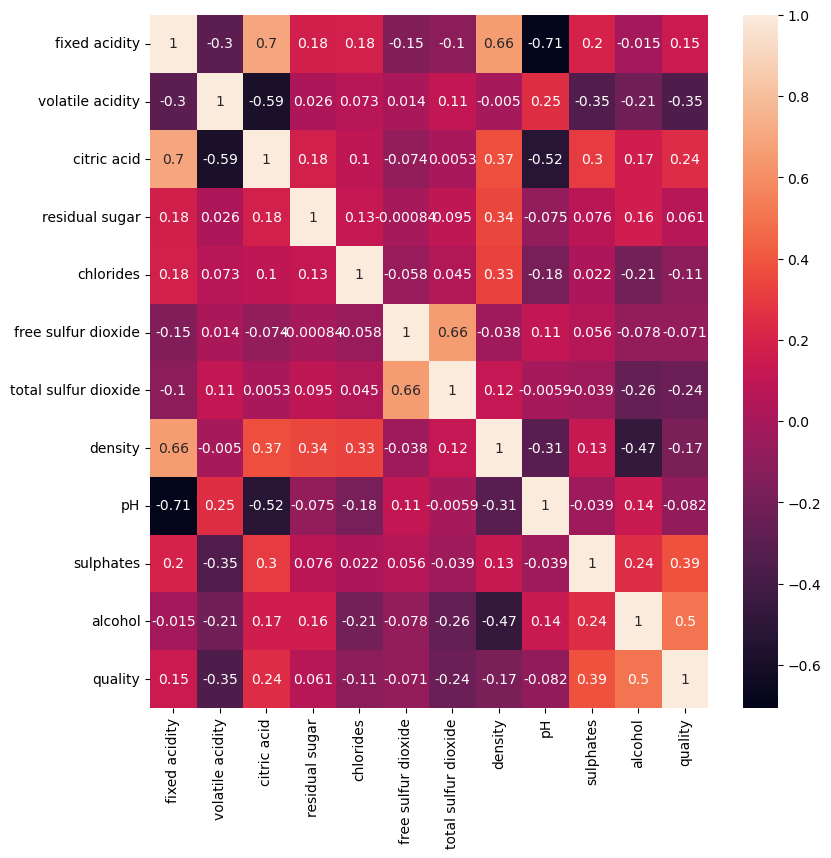

In [233]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(wine.corr(), annot=True)
plt.show()

#### From correlation heat map we can see that some variables pairs are correlated  
* citric acid and fixed acidity have positive correlation
* citric acid and volatile acidity have negative correlation
* fixed acidity and density have positive correlation
* fixed acidity and pH have negative correlation
* citric acid and pH have negative correlation
* total sulfur dioxide and free sulfur dioxide have positive correlation 
* density and alcohol have negative correlation

### EDA using Histograms

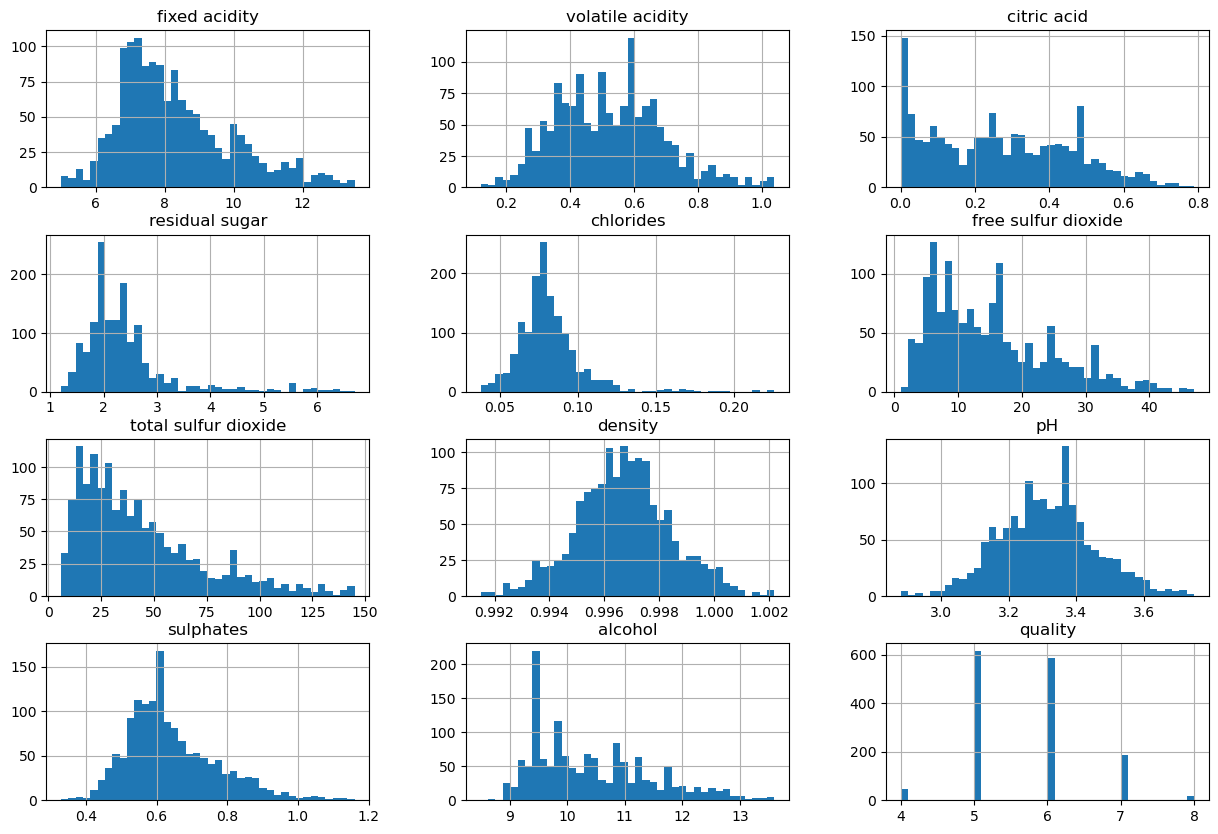

In [234]:
# checking distribution of data using histograms
wine.hist(bins=40, figsize=(15, 10))
plt.show()

#### Histogram observations
* From histograms we can see that alcohol and quality are normally distribuited while other variables are rightly skewed in dataset. 

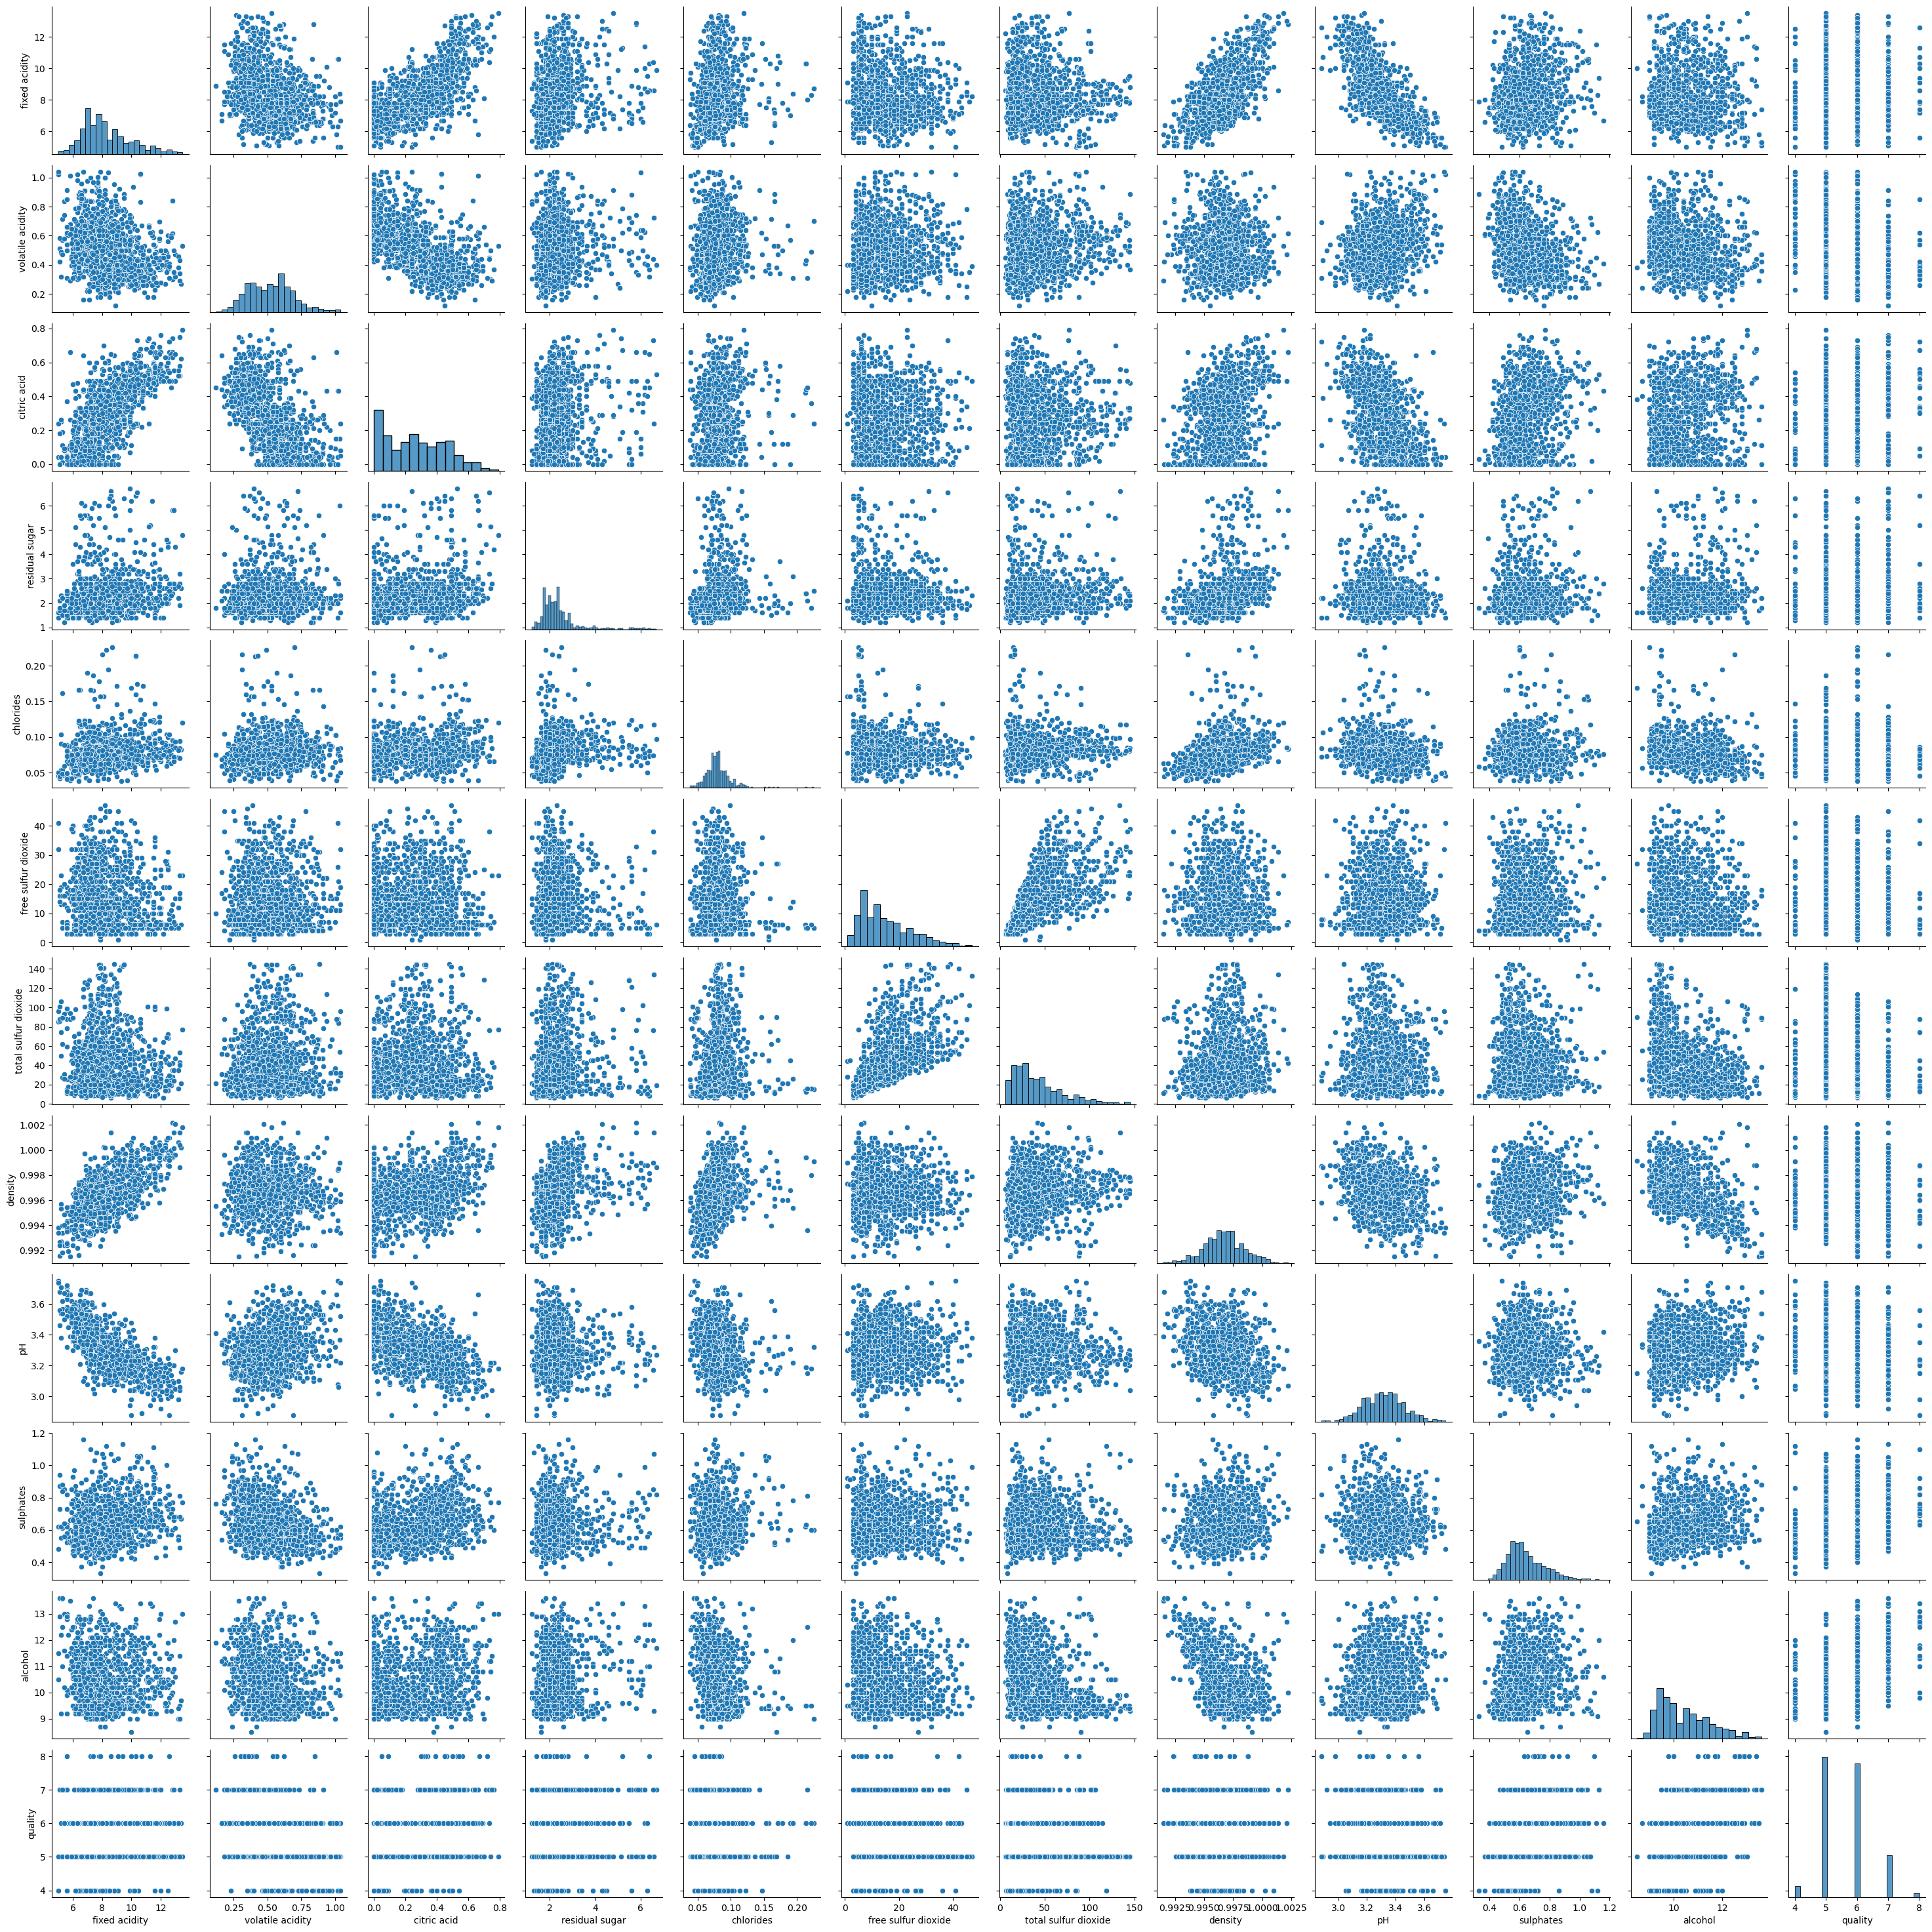

In [235]:
# Visularizing pair wise relations
import seaborn as sns
sns.pairplot(wine)

In [236]:
# preparing data for modeling
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [237]:
wine.shape

(1451, 12)

In [238]:
# Removing space in column names , replacing space with _ 
wine.columns = [column.replace(' ', '_') for column in wine.columns]

In [239]:
print(wine.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

* We can see that column names do not have space anymore

In [240]:
# seperating feature and target columns
features = wine.drop(['quality'] , axis = 1)
target = wine['quality']

In [241]:
# scaling the features 
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the DataFrame
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled values
scaled_features = pd.DataFrame(scaled_data, columns=features.columns)

# Print the scaled DataFrame
print(scaled_features)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
1         -0.309900          2.119336    -1.390400        0.246832   0.790825   
2         -0.309900          1.407054    -1.180831       -0.101284   0.504550   
3          1.755851         -1.442071     1.543569       -0.565439  -0.306564   
4         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
...             ...               ...          ...             ...        ...   
1446      -1.282019          0.457346    -0.971261       -0.449401   0.409125   
1447      -1.464291          0.160562    -0.866477       -0.217323  -0.926828   
1448      -1.221261         -0.076865    -0.709300       -0.101284  -0.258851   
1449      -1.464291          0.724451    -0.761692       -0.449401  -0.306564   
1450      -1.403533         -1.264001     1.072038        1.407221  -0.688265   

      free_sulfur_dioxide  

In [242]:
# Labelling the target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(wine.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [243]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_features,y, test_size = 0.2, random_state = 0)

* our dataset is splitted into train and test set. It is ready for modelling

In [244]:
import tensorflow as tf

## Implementing a Neural Network using TF Estimator DNN Classifier

In [245]:
#  creating and returning a list of numeric feature columns using the tf.feature_column.numeric_column function.
def create_feature_column():
    feat_fixed_acidity = tf.feature_column.numeric_column('fixed_acidity')
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_citric_acid= tf.feature_column.numeric_column('citric_acid')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_free_sulfur_dioxide  = tf.feature_column.numeric_column('free_sulfur_dioxide')
    feat_total_sulfur_dioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density              = tf.feature_column.numeric_column('density')
    feat_pH  = tf.feature_column.numeric_column('pH')
    feat_sulphates  = tf.feature_column.numeric_column('sulphates')
    feat_alcohol  = tf.feature_column.numeric_column('alcohol')


    feature_column = [ feat_fixed_acidity,feat_volatile_acidity,feat_citric_acid,feat_residual_sugar, feat_chlorides, 
                       feat_free_sulfur_dioxide,feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column
feature_column = create_feature_column()

* It provides a convenient way to define the feature columns that can be used as input to a TensorFlow model for training or prediction tasks.

In [246]:
# Creating input function
def traineval(x_train, y_train, training=False, batch_size=128):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

* It converts the input features and labels into a TensorFlow Dataset, shuffles and repeats the dataset if in training mode, and batches the data based on the specified batch size. The prepared dataset can be used for training or evaluation of TensorFlow models.

In [247]:
# Define the feature columns
my_feature_columns = []
for key in wine.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

* A feature column is an object describing how the model should use raw input data from the features dictionary. 

In [248]:
# Initiating DNN estimator
dnn = tf.estimator.DNNClassifier(hidden_units = [20,20,20],
                                      feature_columns = feature_column,
                                      n_classes= 6,
                                      activation_fn=tf.nn.relu,
                                      dropout=None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Surya\\AppData\\Local\\Temp\\tmpzxm7tu92', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [249]:
# Training the model
dnn.train(
    input_fn= lambda: traineval(x_train, y_train , training=True), steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Surya\AppData\Local\Temp\tmpzxm7tu92\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.5991578, step = 0
INFO:tensorflow:global_step/sec: 789.993
INFO:tensorflow:loss = 1.5277236, step = 100 (0.127 sec)
INFO:tensorflow:global_step/sec: 977.857
INFO:tensorflow:loss = 1.4186435, step = 200 (0.102 sec)
INFO:tensorflow:global_step/sec: 1168.65
INFO:tensorflow:loss = 1.395915, step = 300 (0.086 sec)
INFO:tensorflow:global_step/sec: 1238.39
INFO:tensorflow:loss = 1.2744534, step = 400 (0.081 sec)
INFO:tensorflow:global_step/sec: 1232.35
INFO:tensorflow:loss = 1.2561107, s

In [250]:
# Evaluating the trained model
eval_result = dnn.evaluate(input_fn=lambda: traineval(x_test, y_test, training=False))
predictions = dnn.predict(input_fn=lambda: traineval(x_test, y_test, training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-05T22:29:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Surya\AppData\Local\Temp\tmpzxm7tu92\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.19304s
INFO:tensorflow:Finished evaluation at 2023-06-05-22:29:56
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.56013745, average_loss = 1.0773865, global_step = 5000, loss = 1.006195
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\Surya\AppData\Local\Temp\tmpzxm7tu92\model.ckpt-5000


In [251]:
# printing evaluation result
print(eval_result)

{'accuracy': 0.56013745, 'average_loss': 1.0773865, 'loss': 1.006195, 'global_step': 5000}


* We can see that our accuracy is 0.56 and average loss is 1.07. Accuracy represents the proportion of correctly classified instances in the evaluation dataset. Average loss represents the average value of the loss function calculated over all evaluation instances. A lower average loss indicates better predictive performance.

## Implementing a Neural Network using TF.Keras

In [252]:
# one hot encoding the target classes/column
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [253]:
# Building the neural network using keras
nn = tf.keras.models.Sequential(layers = None , name = None)
nn.add(tf.keras.layers.Input(shape = 11,))
nn.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
nn.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                192       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 6)                 54        
                                                                 
Total params: 382
Trainable params: 382
Non-trainable params: 0
_________________________________________________________________


* the code builds a neural network model with an input layer, two hidden layers with relu activation, and an output layer with sigmoid activation. The model is suitable for classification tasks with 11 input features and 6 possible classes.

In [254]:
# Configuiring and fitting the model
nn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = nn.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Epoch 1/150
37/37 [==============================] - 1s 4ms/step - loss: 1.5617 - accuracy: 0.3810 - val_loss: 1.4310 - val_accuracy: 0.4330
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 1.3379 - accuracy: 0.4483 - val_loss: 1.2622 - val_accuracy: 0.4605
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 1.1986 - accuracy: 0.4966 - val_loss: 1.1720 - val_accuracy: 0.5292
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.5190 - val_loss: 1.1206 - val_accuracy: 0.5464
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 1.0583 - accuracy: 0.5664 - val_loss: 1.0909 - val_accuracy: 0.5704
Epoch 6/150
37/37 [==============================] - 0s 1ms/step - loss: 1.0197 - accuracy: 0.5802 - val_loss: 1.0701 - val_accuracy: 0.5601
Epoch 7/150
37/37 [==============================] - 0s 1ms/step - loss: 0.9927 - accuracy: 0.5940 - val_loss: 1.0585 - val_accuracy: 0.5567
Epoch 8/150
3

In [255]:
nn.evaluate(x_test, y_test_cat)[1]

10/10 [==============================] - 0s 1ms/step - loss: 1.0174 - accuracy: 0.6151


0.6151202917098999

* Our model has achieved an accuracy of approximately 61.51% on the test dataset. The loss value during the evaluation was 1.0174. The accuracy is a metric that measures the percentage of correctly predicted labels, while the loss represents the error between the predicted and true values.

In [256]:
import matplotlib.pyplot as plt

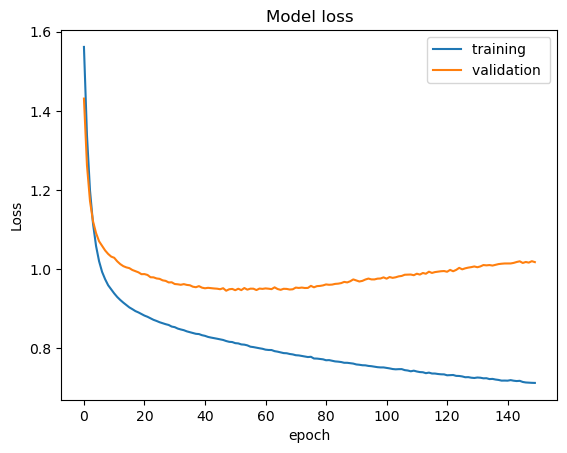

In [259]:
#Here we plot the loss vs Validation loss using a line graph.
plt.plot(history.history['loss'], label='training ')
plt.plot(history.history['val_loss'], label='validation ')
plt.legend()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

* From the graph we can interpret that our training loss keep on decreasing after every epoch while our validation loss get stable after 20th epoch. Validation loss start increasining slowly after 80th epoch.

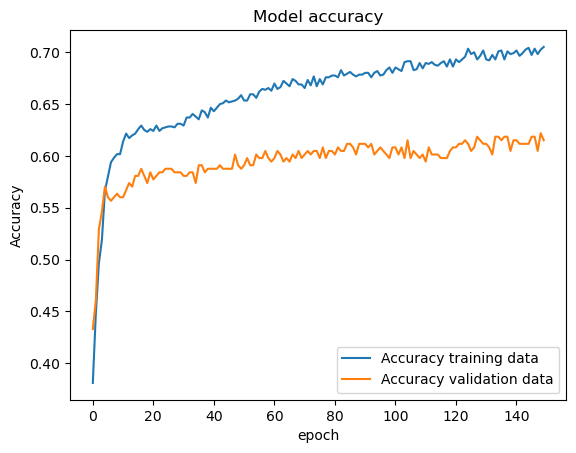

In [258]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

* From the graph we can interpret that initially there is a jump in accuracy and training accuracy keep on increasing steadily after every epoch while validation accuracy gets stable around 20th epoch and increases very slowly after that reaching till 61%

### Observation / Reasoning 
* The training loss is decreasing after every epoch. This indicates that our model is learning and improving its ability to make predictions on the training data. A decreasing training loss is generally a positive sign, showing that the model is converging towards better performance.
* The validation loss stabilizes after the 20th epoch and starts to increase slowly after the 80th epoch. This suggests that the model's performance on the validation data initially improves but then reaches a plateau. After a certain point, the model may start to overfit the training data, leading to an increase in the validation loss. Monitoring the validation loss helps to identify the optimal point at which to stop training the model to prevent overfitting.
* The training accuracy keeps increasing steadily after every epoch. This indicates that the model is becoming better at predicting the correct labels for the training data. Increasing training accuracy is a positive sign, as it suggests that the model is learning and capturing the patterns present in the training dataset.
* The validation accuracy stabilizes around the 20th epoch and increases very slowly after that, reaching 61%. This suggests that the model's performance on the validation data reaches a certain point and does not improve significantly beyond that. The slow increase in validation accuracy indicates that the model may be starting to reach its performance limits and further improvements may require more complex techniques or adjustments to the model architecture or training process.

* Furthermore, It could be worth exploring regularization techniques or adjusting the model's architecture to address this issue and potentially improve the overall performance.

### Observation / Reasoning 
* The DNN classifier achieves an accuracy of around 56% on the data, which suggests that it has some predictive capability but may not be highly accurate. The average loss and loss values indicate that the model has a moderate amount of error in its predictions.
* The Keras neural network achieves a higher accuracy of around 70.52% on the training data compared to the DNN classifier. The loss and accuracy values suggest that the Keras model performs better than the DNN classifier on the given data. However, the validation loss and validation accuracy indicate that the Keras model may not generalize well to unseen data, as the validation accuracy is lower than the training accuracy.
* the Keras neural network appears to outperform the DNN classifier in terms of accuracy and loss on the given data. However, the validation results suggest that the Keras model may benefit from further optimization or regularization techniques to improve its generalization performance and avoid overfitting.